### some useful functions to figure out which settings to use

In [3]:
from nbodykit.cosmology import Planck15
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def a2z(a):
    return 1./a-1

def z2a(z):
    return 1./(1.+z)

In [5]:
def get_physical_width(cosmology,z_source,fov):
    """returns physical extent (comoving angular diameter distance) in Mpc/h 
    of a field of view (fov,in degrees) 
    at source redhsift z_source for a specific cosmology"""
    chi_source = cosmology.angular_diameter_distance(z_source)
    fov_rad    = fov/180.*np.pi
    width      = fov_rad*chi_source
    
    return width*(1+z_source)

In [6]:
def get_volume(z_source,FOV, cosmo):
    """
    returns the comoving volume of the lightcone in [Mpc/h]^3
    z_source: highest source redshift
    FOV: field of view in degrees (2D, in degrees)
    """
    h = cosmo.comoving_distance(z_source)
    ls= [deg/180.*np.pi*h for deg in FOV]
    V = np.prod(ls)*h/3.
    return V

In [7]:
def get_fov(cosmo,BoxSize,z_source):
    """
    get the field of view (in degrees) for given boxsize and source redshift
    """
    chi_source = cosmo.angular_diameter_distance(z_source)*(1+z_source)
    fov        = BoxSize/chi_source/np.pi*180.
    # try to avoid numerical inaccuracies]
    frac =0.98
    while True:
        if np.round(fov*frac,1)<fov*0.99:
            break
        else:
            frac-=0.01
    return np.round(fov*frac,1)

In [8]:
def get_num_boxes(cosmo, boxsize, z_source):
    """
    number of box repetitions up source redshift
    """
    h   = cosmo.comoving_distance(z_source)
    num = h/boxsize
    return num

In [8]:
cosmo_fid  = Planck15
cosmo_min  = Planck15.match(Omega0_m=0.05)
cosmo_max  = Planck15.match(Omega0_m=0.95)
boxsizes   = [512,256,128]
z_sources  = [0.5,1.0,1.5,2.0]

In [9]:
for boxsize in boxsizes:
    for zs in z_sources:
        print('Boxsize: ', boxsize, 'z_source: ', zs, 'FOV: ', get_fov(Planck15,boxsize,zs))

Boxsize:  512 z_source:  0.5 FOV:  21.8
Boxsize:  512 z_source:  1.0 FOV:  12.5
Boxsize:  512 z_source:  1.5 FOV:  9.5
Boxsize:  512 z_source:  2.0 FOV:  8.0
Boxsize:  256 z_source:  0.5 FOV:  10.9
Boxsize:  256 z_source:  1.0 FOV:  6.2
Boxsize:  256 z_source:  1.5 FOV:  4.7
Boxsize:  256 z_source:  2.0 FOV:  4.0
Boxsize:  128 z_source:  0.5 FOV:  5.5
Boxsize:  128 z_source:  1.0 FOV:  3.1
Boxsize:  128 z_source:  1.5 FOV:  2.3
Boxsize:  128 z_source:  2.0 FOV:  2.0


In [10]:
#S_8 at fiducial
def S_8(Omega_m, sigma_8):
    return sigma_8*(Omega_m/0.3)**0.5

def sigma_8(Omega_m,S_8_fid):
    return S_8_fid*(Omega_m/0.3)**(-0.5)

In [11]:
S_8_fid = S_8(0.3089,0.8158)

In [39]:
S_8_fid

0.8278125911017944

In [42]:
Omega_m_min =0.1
Omega_m_max =0.5

In [63]:
Omega_ms = np.linspace(Omega_m_min,Omega_m_max,5)

In [64]:
sigma8s  = sigma_8(Omega_ms,S_8_fid)

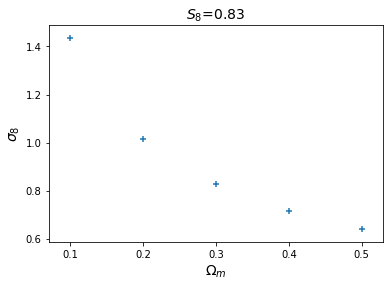

In [65]:
plt.title('$S_8$=%.2f'%S_8_fid, fontsize=14)
plt.scatter(Omega_ms,sigma8s, marker='+')
plt.ylabel('$\sigma_8$',fontsize=14)
plt.xlabel('$\Omega_m$',fontsize=14)
plt.show()

In [66]:
cosmo_min  = Planck15.match(Omega0_m=Omega_m_min)
cosmo_max  = Planck15.match(Omega0_m=Omega_m_max)
boxsize    = 256
z_source   = 1.

fov_min = get_fov(cosmo_min,boxsize,z_source)
fov_max = get_fov(cosmo_max,boxsize,z_source)

num_box_min = get_num_boxes(cosmo_min,boxsize,z_source)
num_box_max = get_num_boxes(cosmo_max,boxsize,z_source)

In [67]:
import pickle

In [68]:
path = '/global/homes/v/vboehm/codes/MADLens/run_specs/'


In [69]:
pickle.dump([fov_max,Omega_ms,sigma8s],open(path+'S_8_test_run.pkl','wb'))